In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

---

---
#What is the price of a house in Wicker Park with the following characteristics:
###Single Family Home
###3.96 miles from Lake Michigan
###2 baths
###110 years old
###Lot size 3049 sf
###House size 3154 sf
###Local Crime Index is 3.76
###School Index is 16.7
####Ignore the distance from the loop!
---

---

---
##This is an actual dataset comprising around 13000 house prices in the Chicago area
---

---
## 1. Load the database
---

In [3]:
#data = pd.read_csv("/Users/mrgholt/GADS-22-NYC/Datasets/chicagohouseprices-V2.csv")

---
## Perform and EDA on the data
###Consider renaming the columns
###What's the situation with column types
###We are going to be performing a regression on a number of variables with house price
---

In [4]:
#data.dtypes

Address             object
Neighborhood        object
House Type          object
Price                int64
Bath               float64
Crime Index         object
Minutes to Loop     object
Miles to Lake      float64
Age                 object
Lot (sqft)          object
SIZE (sqft)         object
School Index        object
dtype: object

---
##You can ignore the Minutes to Loop column

##Ensure the following columns are numeric, convert them if necessary:
### * Price
### * Bath
### * Crime Index
### * Miles to the Lake
### * Age
### * Lot (sqft)
### * SIZE (sqft)
### * School Index
---

---
##What missing values are there besides NaNs?
##These will need to be "handled". hint: convert them to NaN
---

---
##Feature selection
### * show the correlation coefficients between the input features and price
---

In [8]:
#data.corr()

---
## Write a function that takes your house price data frame a plots 7 graphs, one each for every input feature vs house price
---

In [10]:
def plot_features(df):
    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(331)
    ax.set_title("Baths vs Price")
    ax.set_xlabel("Number of Baths")
    ax.set_ylabel("Price")
    ax.set_xlim(0,5)
#    ax.plot(df.<your bath column name>, df.<Your price column name>, '.')
    
    #Add to this code here
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

---
##Now go ahead an plot the data frame
---

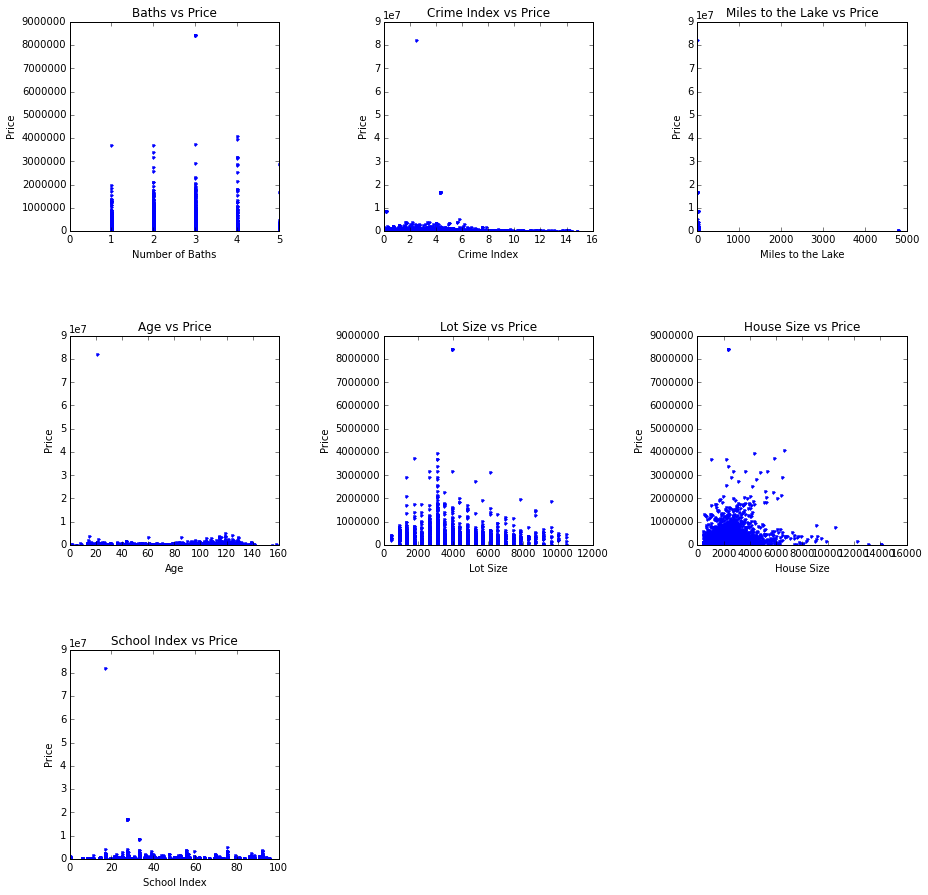

In [22]:
plot_features(data)

---
##There is an obvious issue with an outlier
###Below are 2 functions that will identify and help you remove outliers
---

In [23]:
#An outlier is defined as anything that is 1.5 times the interquartile range above the 75th quartile, or 1.5 times
# the interquartile range below the 25th quartile
def get_outlier_thresholds(x):
    lower_25 = x.quantile(0.25)
    upper_75 = x.quantile(0.75)
    high_threshold = upper_75 + 1.5 * (upper_75-lower_25)
    low_threshold = lower_25 - 1.5 * (upper_75-lower_25)
    return(low_threshold, high_threshold)

In [24]:
def remove_outliers(x, low, high):
    if x > high:
        return np.nan
    elif x < low:
        return np.nan
    else:
        return x

---
## You should sanity check the outlier thresholds that the function above returns
---

In [26]:
#low, high = get_outlier_thresholds(data.Price)
#print low, high

-190500.0 629500.0


---
##The values can be assessed and handled using the pandas map function and the anonymous lambda function
---

In [27]:
#Handling the price outlier
#new_price = data.Price.map((lambda x: remove_outliers(x, low, high)))

In [28]:
#data.Price = new_price

In [13]:
#low, high = get_outlier_thresholds(data.Miles_to_Lake)
#print low, high

In [15]:
#Handling the miles to the lake outliers
#new_miles_to_lake = data.Miles_to_Lake.map((lambda x: remove_outliers(x, low, high)))

In [16]:
#data.Miles_to_Lake = new_miles_to_lake

---
## Now replot and carefully compare with the previous plots
---

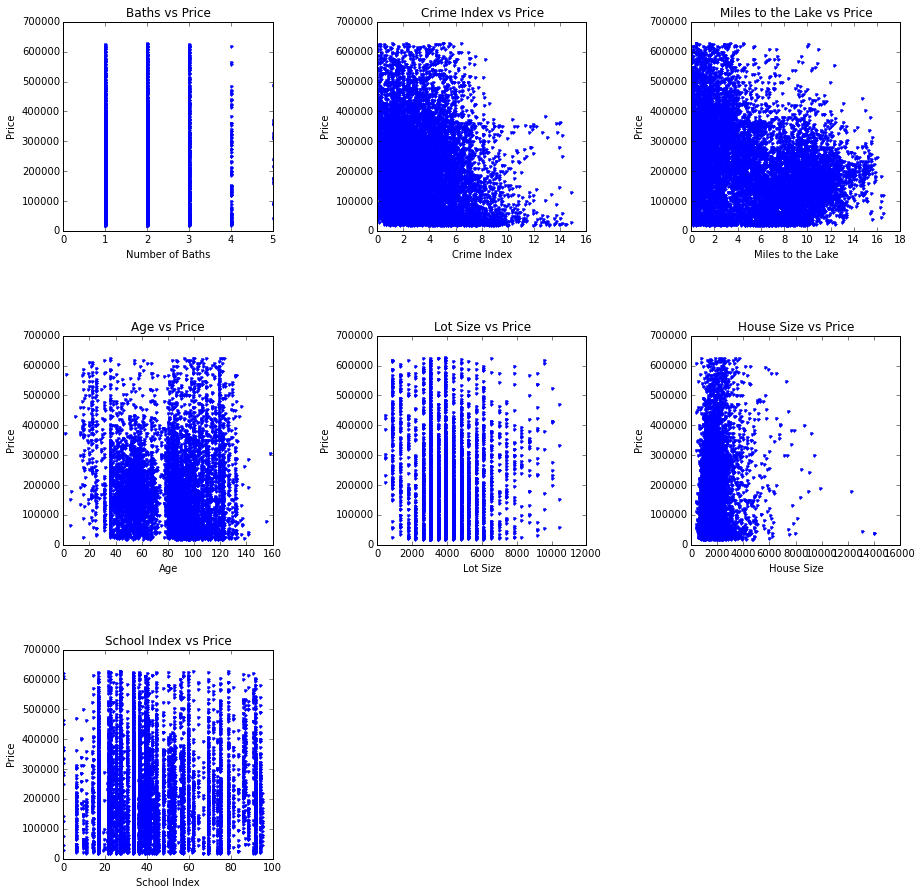

In [33]:
plot_features(data)

---
##There are no clear correlations, but this is not surprising given the many different types of family homes in the dataset

##The house in Wicker Park is a single family home, so let's filter the dataset for single family homes

##How many records in the dataset does that leave?

##Review the correlations and plots again
---

In [34]:
#mask = ["single" in str(ht).lower() for ht in data['Type'].values]

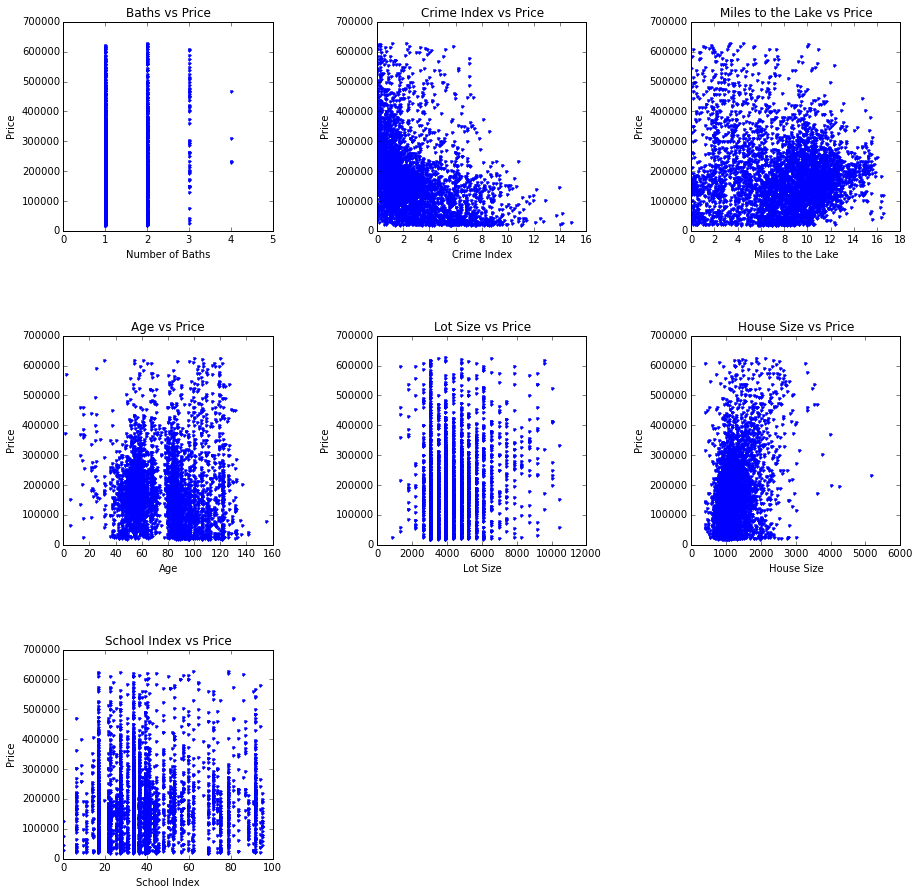

In [39]:
plot_features(sfh_data)

---
##Obviously we are also now considering many single family homes in all the Chicago neighborhoods
##Let's just look at Wicker Park
##Filter the dataset again
##Now how many records are left
##Review the correlations and replot
---

In [43]:
#mask = ["wicker" in str(ht).lower() for ht in sfh_data['Neighborhood'].values]

In [46]:
wpark_data.corr()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
Price,1.000000,-0.200070,0.287717,NaN,-0.300628,-0.615696,-0.228401,-0.061443,-0.135956
Baths,-0.200070,1.000000,0.399736,NaN,-0.256671,-0.217752,-0.140687,0.868406,-0.081002
CI,0.287717,0.399736,1.000000,NaN,-0.116869,0.247187,-0.208220,0.392431,-0.016237
Mins_to_Loop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miles_to_Lake,-0.300628,-0.256671,-0.116869,NaN,1.000000,0.177051,0.381170,-0.095171,-0.117620
Age,-0.615696,-0.217752,0.247187,NaN,0.177051,1.000000,-0.261901,-0.094026,0.042016
Lot_size,-0.228401,-0.140687,-0.208220,NaN,0.381170,-0.261901,1.000000,-0.118141,0.140950
House_size,-0.061443,0.868406,0.392431,NaN,-0.095171,-0.094026,-0.118141,1.000000,-0.071581
SI,-0.135956,-0.081002,-0.016237,NaN,-0.117620,0.042016,0.140950,-0.071581,1.000000


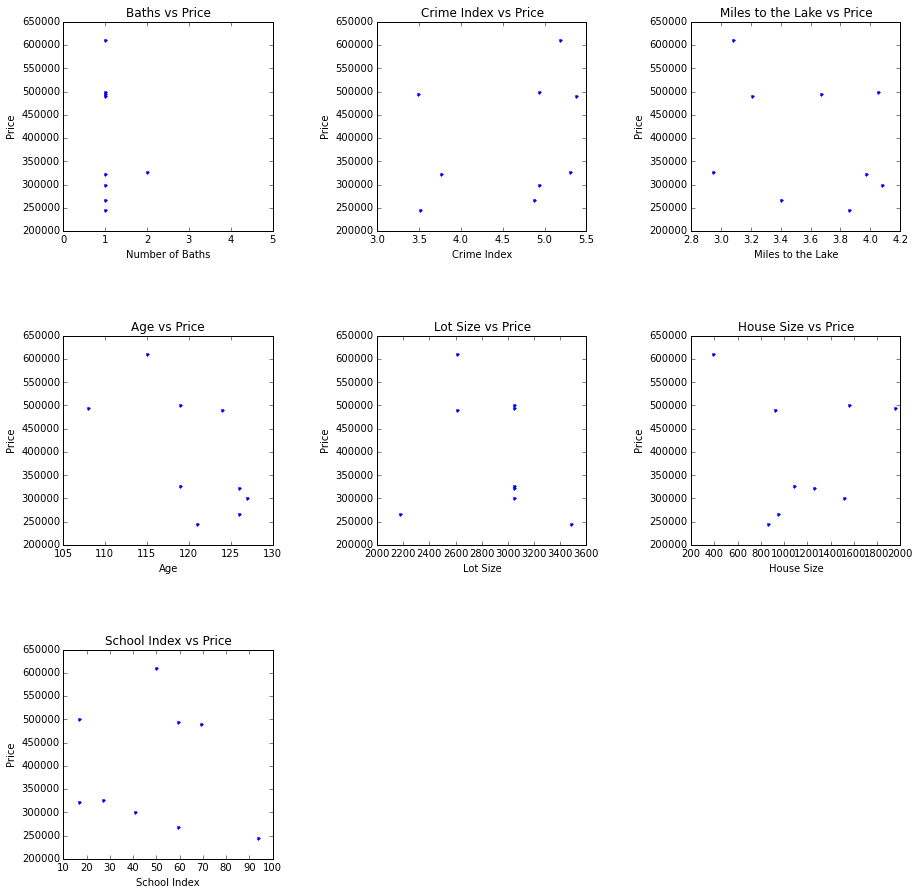

In [47]:
plot_features(wpark_data)

---
##Within the Wicker Park subset there is another Price outlier, which can be removed
---

In [220]:
#low, high = get_outlier_thresholds(sfh_wp_data.Price)
#print low, high

-142500.0 1717500.0


In [227]:
#new_price = sfh_wp_data.Price.map((lambda x: remove_outliers(x, low, high)))

In [228]:
#sfh_wp_data.Price = new_price

---
##For the sake of the exercise let's now build a multivariate linear model and predict a price using the top 4 correlated features
---

In [50]:
#final_df = wpark_data[['Miles_to_Lake', 'CI', 'Age', 'Lot_size', 'Price']]

In [53]:
#final_df = final_df.dropna()

In [54]:
#final_df.describe()

,Miles_to_Lake,CI,Age,Lot_size,Price
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,3.585556,4.595556,120.555556,2904.000000,395111.111111
std,0.436667,0.779152,6.186904,377.154146,129538.309434
min,2.950000,3.490000,108.000000,2178.000000,245000.000000
25%,3.210000,3.760000,119.000000,2614.000000,300000.000000
50%,3.670000,4.930000,121.000000,3049.000000,326000.000000
75%,3.970000,5.180000,126.000000,3049.000000,495000.000000
max,4.080000,5.380000,127.000000,3485.000000,610000.000000


In [56]:
#clf = linear_model.LinearRegression(fit_intercept=True)
#clf.fit (final_df[['Miles_to_Lake', 'CI', 'Age', 'Lot_size']], final_df.Price)
#clf.coef_

array([  1.08653416e+05,   9.74078337e+04,  -1.90784346e+04,
        -9.00663382e+01])

In [57]:
#clf.predict([[3.96, 3.76, 110, 3049]])

array([ 542729.97928852])